# **Churn EDA**


## Dependencies and Settings


In [ ]:
import pandas as pd

ds_path = '../datasets'
def get_ds_path(filename: str):
    return f'{ds_path}/{filename}'

## Data collection and preparation


### Customers Dataframe

---


In [ ]:
# Load dataframe
customers_file = 'churn_customers.csv'
df_customers = pd.read_csv(get_ds_path(customers_file))

In [ ]:
# List the 5 first records on Dataframe
df_customers.head(5)

In [ ]:
# List the 5 last records on Dataframe
df_customers.tail(5)

In [ ]:
# Shows Dataframe schema
df_customers.info()

#### Rename colums


In [ ]:
# Rename all the columns
df_customers.columns = ['CustomerID', 'Gender', 'Above65yo', 'HasPartner', 'HasDependents']

df_customers.info()

### Contracts Dataframe

---


In [ ]:
# Load dataframe
contracts_file = 'churn_contracts.csv'
df_contracts = pd.read_csv(get_ds_path(contracts_file))

In [ ]:
# List the 5 first records on Dataframe
df_contracts.head(5)

In [ ]:
# List the 5 last records on Dataframe
df_contracts.tail(5)

In [ ]:
# Shows Dataframe schema
df_contracts.info()

In [ ]:
# Renames the ternure column, capitalizing it
df_contracts.rename(
    columns={'tenure': 'Tenure'},
    inplace=True
)

df_contracts.info()

#### Data transformation


In [ ]:
# Transform TotalCharges from string to float
df_contracts.TotalCharges = pd.to_numeric(
    df_contracts.TotalCharges, 
    errors='coerce'
) 

df_contracts.info()

After transformation, TotalCharges now has 11 null elements


### Services Dataframe

---


In [ ]:
# Load dataframe
services_file = 'churn_services.csv'
df_services = pd.read_csv(get_ds_path(services_file))

In [ ]:
# List the 5 first records on Dataframe
df_services.head(5)

In [ ]:
# List the 5 last records on Dataframe
df_services.tail(5)

In [ ]:
# Shows Dataframe schema
df_services.info()

### Unify Contracts, Costumers and Services Dataframes

---


In [ ]:
# Count the records on each dataframe
contracts_length = len(df_contracts)
services_length = len(df_services)
costumers_length = len(df_customers)

length_comparative = f'{contracts_length}-{services_length}-{costumers_length}'

length_comparative

Rename primary identifiers


In [ ]:
# Rename identifiers
df_services.rename(
    columns={'customerID': 'CustomerID'},
    inplace=True
)

df_services.info()

In [ ]:
df_contracts.rename(
    columns={'customerID': 'CustomerID'},
    inplace=True
)

df_contracts.info()

In [ ]:
# Unifies Customers and Services Dataframe, creating a new one
df_churn = df_customers.merge(df_services, on=['CustomerID']).merge(df_contracts, on=['CustomerID'])

df_churn.info()

## Absent value tratative


In [ ]:
# Absent values detection of all columns in a Dataframe
df_churn.isna().sum()

In [ ]:
# Absent values detection of a column in a Dataframe
df_churn.TotalCharges.isna().sum()

In [ ]:
# How much lines has at least 1 column with absent value
df_churn[df_churn.isna().any(axis=1)]

In [ ]:
# How much columns has at least 1 with absent value
df_churn.isna().any(axis=0).sum()

Absent values remotion


In [ ]:
# Direct and specific way to remove a column with absent values
df_churn.drop(columns=['TotalCharges'], axis=1)

In [ ]:
# Remove columns with absent values
df_churn.dropna(axis=1)

In [ ]:
# Remove columns with all absent values
df_churn.dropna(axis=1, how='all')

In [ ]:
# Remove lines with absent values
df_churn.dropna(axis=0)

In [ ]:
# Remove lines with all absent values
df_churn.dropna(axis=0, how='all')

Inserting missing values


In [ ]:
# Replace all absent values with 0
df_churn.fillna(0)

In [ ]:
# Replace all absent values by column type
df_churn.fillna(value={'TotalCharges': 0, 'Gender': 'Not declared'})

In [ ]:
# Replace all absent values with the mean
mean_TotalCharges = df_churn.TotalCharges.mean()

mean_TotalCharges

In [ ]:
df_churn.fillna(value={'TotalCharges': mean_TotalCharges, 'Gender': 'Not declared'})

## Univariate Analysis


- Customer age group has a strong association with the churn
- Customer with a contracts lasting less than 6 months is more prune to the churn
- Customer with monthly contract is more prune to the churn


In [ ]:
# Identify possible values (uniques) in a variable
df_churn.Churn.unique()

In [ ]:
# Count customers using the variable churn as reference - numerically
df_churn.Churn.value_counts()

In [ ]:
# Count customers using the variable churn as reference - proportion 
df_churn.Churn.value_counts(normalize=True)

In [ ]:
# Distribuition churn plot (quantity)
ax = df_churn.Churn.value_counts().plot.bar()

ax.bar_label(ax.containers[0])

In [ ]:
# Distribuition churn plot (percentage quantity)
ax = df_churn.Churn.value_counts(normalize=True).plot.bar()

ax.bar_label(ax.containers[0])

In [ ]:
# Types of contract
df_churn.Contract.unique()

In [ ]:
df_churn.Contract.value_counts(normalize=True)

In [ ]:
# Distribuition contract plot (percentage quantity)
ax = df_churn.Contract.value_counts(normalize=True).plot.bar()

ax.bar_label(ax.containers[0])

In [ ]:
df_churn.Tenure.plot.hist()

- The contract time variable (tenure) doesn't visually apresent a normal distribuition.
- Most of the values ​​are concentrated in the extremes, in other words, contracts with less activation months and long (65+) are more frequent.


In [ ]:
# Monthly Charges histogram
df_churn.MonthlyCharges.plot.hist()

In [ ]:
# Position measurements - Contract time mean
df_churn.Tenure.mean()

In [ ]:
# Position measurements - Contract time median
df_churn.Tenure.median()

In [ ]:
# Position measurements - Contract time mode
df_churn.Tenure.mode()

In [ ]:
# Dispersion measurements - Standard deviation
df_churn.Tenure.std()

In [ ]:
# Dispersion measurements - Variation coefficient
df_churn.Tenure.std() / df_churn.Tenure.mean() * 100

In [ ]:
# How much costumers has one month contract
one_month_tenure_filter = df_churn.Tenure==1 

one_month_contract_costumers_quantity= len(df_churn[one_month_tenure_filter])

one_month_contract_costumers_quantity

In [ ]:
# How much costumers has one month contract represents in percentage
f'{(one_month_contract_costumers_quantity / len(df_churn)) * 100}%'

In [63]:
# How much costumers has one to six months contract
initial_months_range_tenure_filter = (df_churn.Tenure>=1) & (df_churn.Tenure <= 6) 

df_churn[initial_months_range_tenure_filter]

,CustomerID,Gender,Above65yo,HasPartner,HasDependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,No,No phone service,DSL,No,Yes,...,No,No,No,1,Month-to-month,Yes,Electronic check,29.85,29.85,No
2,3668-QPYBK,Male,0,No,No,Yes,No,DSL,Yes,Yes,...,No,No,No,2,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,9237-HQITU,Female,0,No,No,Yes,No,Fiber optic,No,No,...,No,No,No,2,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
20,8779-QRDMV,Male,1,No,No,No,No phone service,DSL,No,No,...,No,No,Yes,1,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
22,1066-JKSGK,Male,0,No,No,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,1,Month-to-month,No,Mailed check,20.15,20.15,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7018,1122-JWTJW,Male,0,Yes,Yes,Yes,No,Fiber optic,No,No,...,No,No,No,1,Month-to-month,Yes,Mailed check,70.65,70.65,Yes
7029,2235-DWLJU,Female,1,No,No,No,No phone service,DSL,No,No,...,No,Yes,Yes,6,Month-to-month,Yes,Electronic check,44.40,263.05,No
7030,0871-OPBXW,Female,0,No,No,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,2,Month-to-month,Yes,Mailed check,20.05,39.25,No
7032,6894-LFHLY,Male,1,No,No,Yes,Yes,Fiber optic,No,No,...,No,No,No,1,Month-to-month,Yes,Electronic check,75.75,75.75,Yes


In [69]:
# Present the customers quantity per contract time - grouping with summarization
df_churn.groupby(['Tenure'])['Tenure'].count().sort_values()

Tenure
0      11
36     50
44     51
39     56
28     57
     ... 
4     176
3     200
2     238
72    362
1     613
Name: Tenure, Length: 73, dtype: int64

<Axes: ylabel='Tenure'>

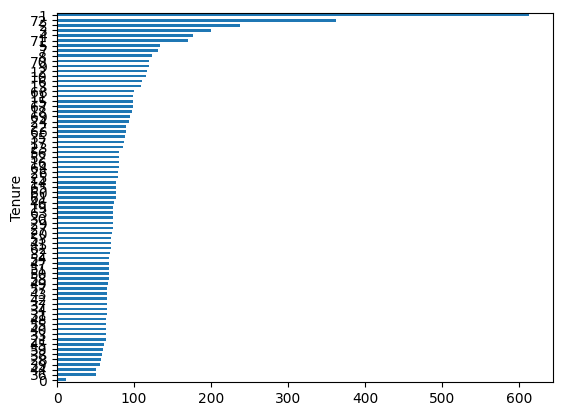

In [71]:
# Present the customers quantity per contract time - plot
df_churn.groupby(['Tenure'])['Tenure'].count().sort_values().plot.barh(figsize=(20, 20))